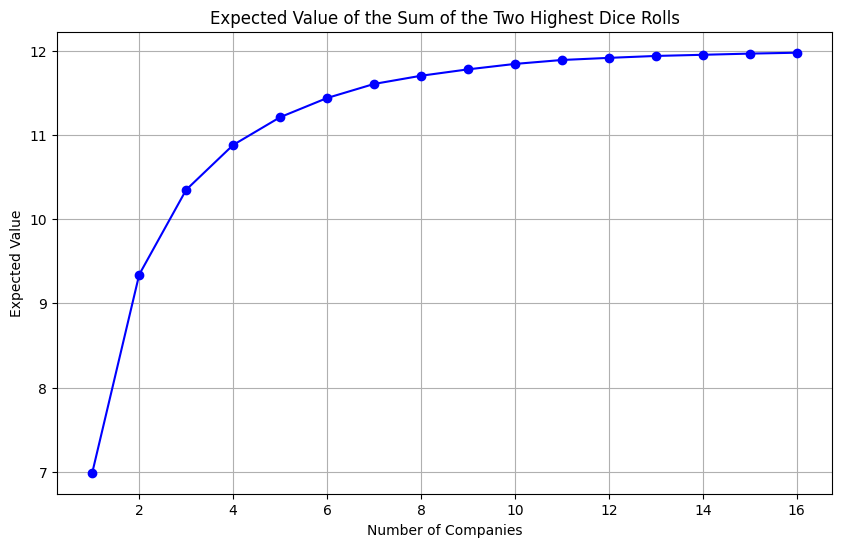

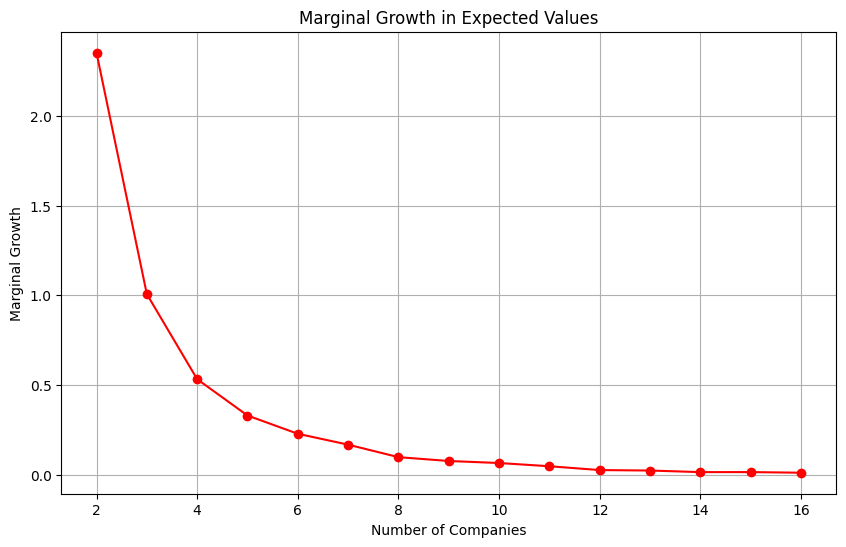

    Number of Companies  Expected Value  Marginal Growth
0                     1          6.9890              NaN
1                     2          9.3417           2.3527
2                     3         10.3484           1.0067
3                     4         10.8805           0.5321
4                     5         11.2101           0.3296
5                     6         11.4378           0.2277
6                     7         11.6048           0.1670
7                     8         11.7021           0.0973
8                     9         11.7780           0.0759
9                    10         11.8426           0.0646
10                   11         11.8892           0.0466
11                   12         11.9145           0.0253
12                   13         11.9372           0.0227
13                   14         11.9510           0.0138
14                   15         11.9650           0.0140
15                   16         11.9755           0.0105
Results have been saved to 'dic

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def simulate_dice_rolls(companies, attempts=2, simulations=10000):
    results = []
    for _ in range(simulations):
        # For each company, roll the dice 'attempts' times
        rolls = np.random.randint(1, 7, size=attempts * companies)
        top_two = np.partition(rolls, -2)[-2:]  # Find the two highest rolls
        results.append(np.sum(top_two))
    return np.mean(results)

# Run simulations for 1 to 16 companies
companies_range = range(1, 17)
expected_values = [simulate_dice_rolls(companies) for companies in companies_range]

# Calculate marginal growth in expected values correctly
marginal_growth = [expected_values[i] - expected_values[i - 1] for i in range(1, len(expected_values))]
marginal_growth.insert(0, np.nan)  # Insert NaN for the first company as there's no previous company to compare

# Plotting the expected values
plt.figure(figsize=(10, 6))
plt.plot(companies_range, expected_values, marker='o', linestyle='-', color='b')
plt.title('Expected Value of the Sum of the Two Highest Dice Rolls')
plt.xlabel('Number of Companies')
plt.ylabel('Expected Value')
plt.grid(True)
plt.show()

# Plotting the marginal growth
plt.figure(figsize=(10, 6))
plt.plot(companies_range, marginal_growth, marker='o', linestyle='-', color='r')
plt.title('Marginal Growth in Expected Values')
plt.xlabel('Number of Companies')
plt.ylabel('Marginal Growth')
plt.grid(True)
plt.show()

# Organizing results into a table
results_df = pd.DataFrame({
    'Number of Companies': list(companies_range),
    'Expected Value': expected_values,
    'Marginal Growth': marginal_growth
})

# Print the results table to console
print(results_df)

# Export the results to a CSV file
results_df.to_csv('dice_rolls_simulation_results.csv', index=False)

print("Results have been saved to 'dice_rolls_simulation_results.csv'.")
